## 1. Importing the required libraries and modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

## 2. Loading the dataset and basic exploration

#### We are using seaborn inbuilt dataset

In [2]:
## load iris dataset
data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data.shape

(150, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### based on info all the features are non null, so there should not be null values, lets confirm this

In [5]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

#### info also shows, all the independent features are numeric in nature 
#### and 'species' is the target (dependent) variable

In [6]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 3. Let's explore target variable - species

In [7]:
data.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

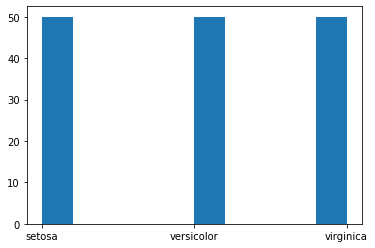

In [8]:
plt.hist(data.species)

#### there are 3 types of species present in the data set and seems like all species has equal count, lets confirm this

In [9]:
data.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

## 4. Independent feature Exploarations

In [10]:
# lets check correlation between the features
cor = data.corr()
cor

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

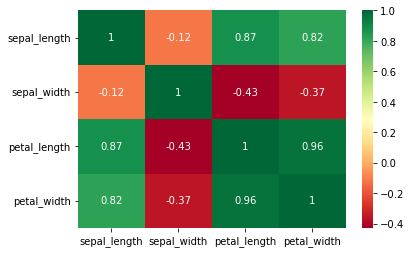

In [11]:
# plot the heatmap to visualize correlation
sns.heatmap(cor, annot = True, cmap="RdYlGn")  

#### petal_length and petal_width are highly positively correlated with each other
#### sepal_length is highly positive correlation with pedal_length and pedal_width
#### sepal_width and petal_length are moderate negatively correlated with each other
#### sepal_width and sepal_length has weak negative correlation between each other

In [12]:
### Creating a function to plot histogram so that we can use it easily multiple times for diff features

def get_distplot(col):
    ax = sns.distplot(data[col], bins = 6)
    Q1 = np.percentile(data[col],25)
    Q3 = np.percentile(data[col],75)
    IQR=Q3-Q1    
    lower_threshold = Q1 - 1.5*IQR
    upper_threshold = Q3 + 1.5*IQR
    
    ax.axvline(Q1, color='red', linestyle='-', label="Q1")
    ax.axvline(Q3, color='blue', linestyle='-', label="Q3")
    ax.axvline(lower_threshold, color='yellow', linestyle='-', label="Lower threshold")
    ax.axvline(upper_threshold, color='green', linestyle='-', label="Upper threshold")
    ax.legend()

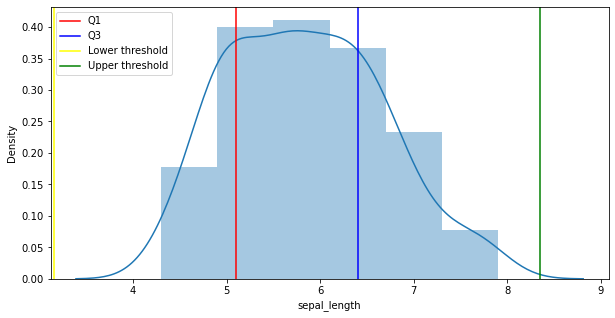

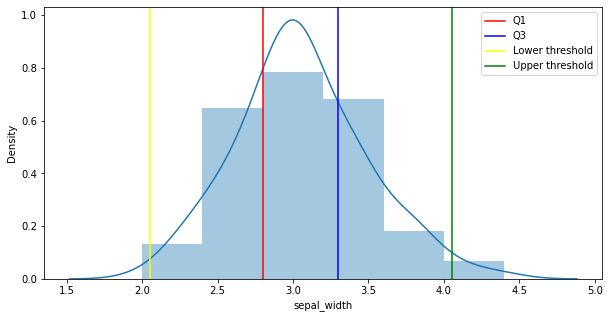

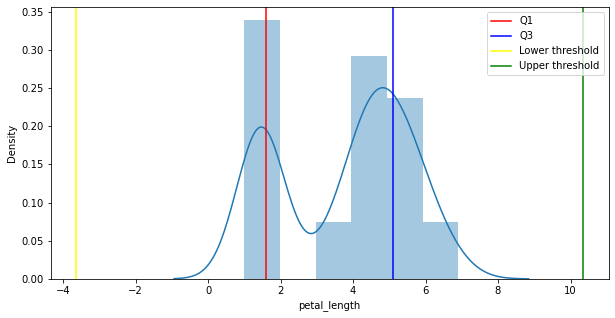

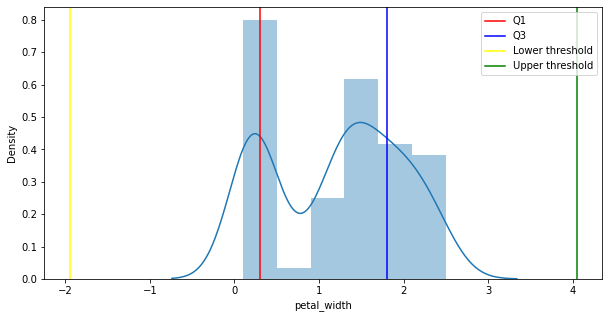

In [13]:
for col in data.columns:
    if col == 'species':
        pass
    else:
        f, (ax1) = plt.subplots(1,1,figsize=(10,5))
        ax1 = get_distplot(col)

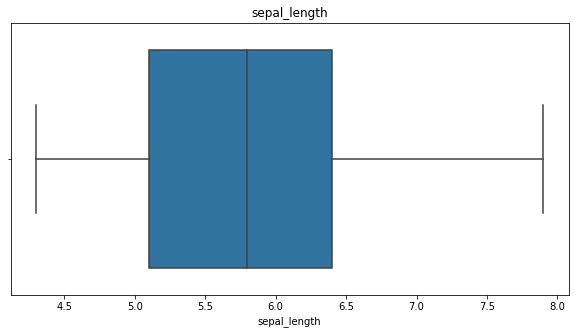

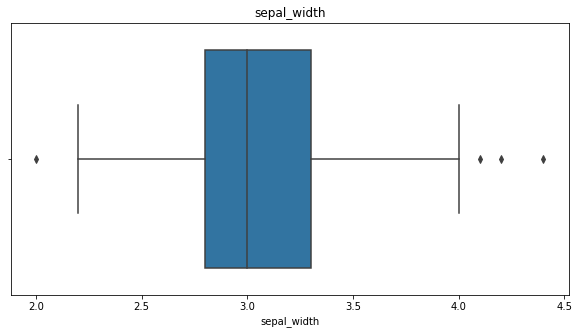

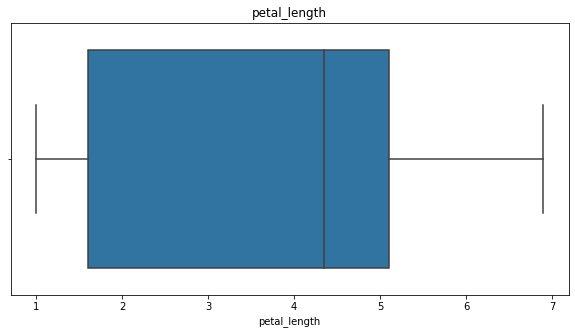

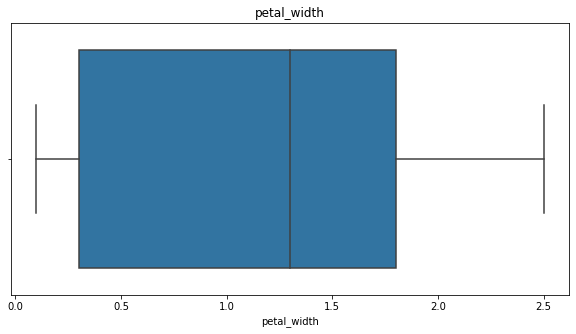

In [14]:
for col in data.columns:
    if col == 'species':
        pass
    else:
        plt.figure(figsize=(10, 5))
        sns.boxplot(data[col])
        plt.title(col)

#### Looks like there are some outliers in sepal_width. 
#### But since sepal_width does not show any skewness lets ignor the outlier for now. 
#### If the model did not perform well then we may need to have a look into the outliers and handle them.

## 5. Preprocessing Data

In [15]:
## independent and dependent features

X = data.iloc[:, :-1].values # idependent
y = data.iloc[:, -1].values # dependent

### Feature Encoding

#### Lets convert target varaible species using label encoding
#### There are different ways to do that, such as onehotencoding, get_dummies or simple map function
#### we will keep the things simple and create map function

In [16]:
def map_species(f):
    if f == 'setosa':
        f = 0
    elif f == 'versicolor':
        f = 1
    elif f == 'virginica':
        f = 2
    return f

In [17]:
data['species'] = data.species.map(map_species)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Feature Scaling

In [18]:
### Applying Standard scaling to get optimized result
sc = StandardScaler()
X = sc.fit_transform(X)

### Train Test data splitting

In [19]:
## Train Test data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## 6. Applying model

In [20]:
### We are using LogisticRegression model

lg = LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression()

In [21]:
pred = lg.predict(X_test)

1. Classification Report:- 
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

2. Accuracy Score:- 
1.0
 
3. Confustion Matrix:- 


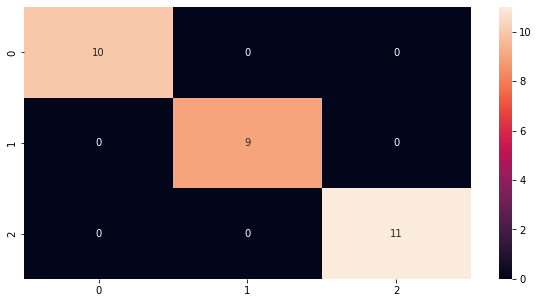

In [22]:
print("1. Classification Report:- ")
print(classification_report(y_test, pred))

print("2. Accuracy Score:- ")
print(accuracy_score(y_test, pred))
print(" ")

print("3. Confustion Matrix:- ")
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, pred), annot=True);

#### We got the 100% accuracy using the model we train.
#### In ideal world this will be rare, we will be happy if our model get around 80% accuracy

### Lets confirm the accuracy by reviewing the actual and predicted values

In [ ]:
pd.DataFrame({'Actual': y_test,  'Predicted': pred}).head(50)